In [52]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LogisticRegression,ElasticNetCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

!pip install category_encoders
import category_encoders as ce
ohe = ce.OneHotEncoder()
oe = ce.OrdinalEncoder()

# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv')

# Recherche des données manquantes
df.isnull().sum()

# Remplacement des années manquantes par 0 (autres)
df[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)

# Remplacement des Publishers manquants par unknown
df['Publisher'] = df['Publisher'].fillna('unknown')

# Retrait des outliers
df.drop(['Rank','Name','gamename','serie','NA_Sales','EU_Sales','JP_Sales','Other_Sales','metaNoteQ','samename'],axis=1,inplace=True)
df = df[df['Global_Sales']<13]

# Conversion de variable categoriel 

#df2["Genre"] = ohe.fit_transform(df2["Genre"])
#df2["Publisher"] = ohe.fit_transform(df2["Publisher"])
#df2["Platform"] = ohe.fit_transform(df2["Platform"])
df2 = ohe.fit_transform(df2)
#df2[['Genre','Publisher','Platform']] = oe.fit_transform(df2[['Genre','Publisher','Platform']])

#dum_pub = pd.get_dummies(df[["Genre","Publisher", "Platform"]],prefix='niveau')
#fusion = pd.concat([df,dum_pub],axis=1)

#df2 = df2.drop(['Genre','Publisher','Platform'],axis=1)

count    11540.000000
mean         6.220589
std         17.150624
min          0.100000
25%          0.800000
50%          2.100000
75%          5.700000
max        827.400000
Name: Global_Sales, dtype: float64
length 10267


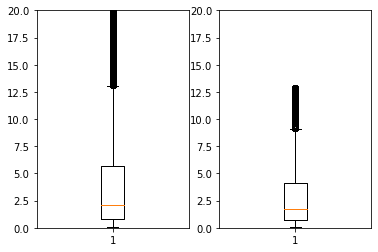

In [138]:
plt.subplot(1,2,1)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,20]);
print(df['Global_Sales'].describe())

df2 = df[df['Global_Sales']<13]
print("length", len(df2))
plt.subplot(1,2,2)
plt.boxplot(df2['Global_Sales']);
plt.ylim([0,20]);

In [53]:
# preprocessing

scaler = preprocessing.StandardScaler().fit_transform(df2)
matrice=df.corr()
#fig,ax=plt.subplots(figsize=(20,20))
#sns.heatmap(matrice, annot=True, cmap='coolwarm');

# définition de la target et data
target = df2['Global_Sales']
data = df2.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

target

31       12.73
32       12.27
33       12.21
34       12.14
35       11.98
         ...  
11535     0.01
11536     0.01
11537     0.01
11538     0.01
11539     0.01
Name: Global_Sales, Length: 11509, dtype: float64

In [54]:
# Test du modèle de regression linéaire

clf = LinearRegression()
clf.fit(X_train_scaled,y_train)
print("Train score :", clf.score(X_train_scaled,y_train))
print("Test score :",clf.score(X_test_scaled,y_test))

y_pred = clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.2708234067001023
Test score : -7.346865818451471e+23
MAE :  117795339346902.22


In [55]:
# Test du modèle RidgeCV

ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train_scaled, y_train)
print("Train score :", ridge_reg.score(X_train_scaled,y_train))
print("Test score :",ridge_reg.score(X_test_scaled,y_test))

y_pred = ridge_reg.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))


Train score : 0.27170843682727897
Test score : 0.2218131241420681
MAE :  43.878235850414725


In [56]:
# Test du modèle Lasso

lasso_r = Lasso(alpha=0.01)
lasso_r.fit(X_train_scaled,y_train)
print("Train score :", lasso_r.score(X_train_scaled,y_train))
print("Test score :",lasso_r.score(X_test_scaled,y_test))

y_pred = lasso_r.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.2592245804142206
Test score : 0.22017749780174667
MAE :  32.52853058138427


In [57]:
# d. Création d'un modèle de régression Elastic Net
l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99) 
alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
model_en=ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas,cv=8)

# e. Entrainement du modèle sur X_train et y_train
model_en.fit(X_train,y_train)
print("Train score :", model_en.score(X_train_scaled,y_train))
print("Test score :",model_en.score(X_test_scaled,y_test))

y_pred = model_en.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : -3.5811055615705323
Test score : -3.374600974082174
MAE :  0.48279781302554853


In [60]:
df3=df
df3[["Genre","Publisher", "Platform"]] = oe.fit_transform(df[["Genre","Publisher","Platform"]])
target = (df3['Global_Sales']*100).astype('int')
data = df3.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Scale
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Test modèle KNN

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train_scaled,y_train)
print("Train score :", knn.score(X_train_scaled,y_train))
print("Test score :",knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.3633105246008472
Test score : 0.04039965247610773
MAE :  79.73457862728063


In [63]:
# Test modèle Regression Logistic

lr = LogisticRegression(C=1.0)
lr.fit(X_train_scaled,y_train)
print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.053763440860215055
Test score : 0.05690703735881842
MAE :  61.19721980886186


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
# test modèle random forest

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = dt_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.9846855653307266
Test score : 0.03866203301476977
MAE :  54.54257167680278


In [65]:
# test modèle random forest
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = RF_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.9846855653307266
Test score : 0.03866203301476977
MAE :  55.807124239791484
